In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from keras.losses import binary_crossentropy

In [3]:
bkgfiles_2016=['/scratch/wjin/featurereduced3/bkg/preselection_2016_dyjetsll_slim.npy',
'/scratch/wjin/featurereduced3/bkg/preselection_2016_gjets_slim.npy',
'/scratch/wjin/featurereduced3/bkg/preselection_2016_qcd_slim.npy',
'/scratch/wjin/featurereduced3/bkg/preselection_2016_singletop_slim.npy',
'/scratch/wjin/featurereduced3/bkg/preselection_2016_tt_slim.npy',
'/scratch/wjin/featurereduced3/bkg/preselection_2016_tt_negligible_slim.npy',
'/scratch/wjin/featurereduced3/bkg/preselection_2016_wjets_slim.npy',
'/scratch/wjin/featurereduced3/bkg/preselection_2016_ww_wz_slim.npy',
'/scratch/wjin/featurereduced3/bkg/preselection_2016_zinv_slim.npy']

bkgfiles_2017=['/scratch/wjin/featurereduced3/bkg/preselection_2017_dyjetsll_slim.npy',
'/scratch/wjin/featurereduced3/bkg/preselection_2017_gjets_slim.npy',
'/scratch/wjin/featurereduced3/bkg/preselection_2017_qcd_slim.npy',
'/scratch/wjin/featurereduced3/bkg/preselection_2017_singletop_slim.npy',
'/scratch/wjin/featurereduced3/bkg/preselection_2017_tt_slim.npy',
'/scratch/wjin/featurereduced3/bkg/preselection_2017_tt_negligible_slim.npy',
'/scratch/wjin/featurereduced3/bkg/preselection_2017_wjets_slim.npy',
'/scratch/wjin/featurereduced3/bkg/preselection_2017_ww_wz_slim.npy',
'/scratch/wjin/featurereduced3/bkg/preselection_2017_zinv_slim.npy']

bkgfiles_2018=['/scratch/wjin/featurereduced3/bkg/preselection_2018_dyjetsll_slim.npy',
'/scratch/wjin/featurereduced3/bkg/preselection_2018_gjets_slim.npy',
'/scratch/wjin/featurereduced3/bkg/preselection_2018_qcd_slim.npy',
'/scratch/wjin/featurereduced3/bkg/preselection_2018_singletop_slim.npy',
'/scratch/wjin/featurereduced3/bkg/preselection_2018_tt_slim.npy',
'/scratch/wjin/featurereduced3/bkg/preselection_2018_tt_negligible_slim.npy',
'/scratch/wjin/featurereduced3/bkg/preselection_2018_wjets_slim.npy',
'/scratch/wjin/featurereduced3/bkg/preselection_2018_ww_wz_slim.npy',
'/scratch/wjin/featurereduced3/bkg/preselection_2018_zinv_slim.npy']

sigfiles_T1bbbb_2016=['/scratch/wjin/featurereduced3/sig/preselection_2016_T1bbbb1_slim.npy',
                     '/scratch/wjin/featurereduced3/sig/preselection_2016_T1bbbb2_slim.npy',
                     '/scratch/wjin/featurereduced3/sig/preselection_2016_T1bbbb3_slim.npy']

sigfiles_T1bbbb_2017=['/scratch/wjin/featurereduced3/sig/preselection_2017_T1bbbb1_slim.npy',
                     '/scratch/wjin/featurereduced3/sig/preselection_2017_T1bbbb2_slim.npy',
                     '/scratch/wjin/featurereduced3/sig/preselection_2017_T1bbbb3_slim.npy',
                     '/scratch/wjin/featurereduced3/sig/preselection_2017_T1bbbb4_slim.npy',
                     '/scratch/wjin/featurereduced3/sig/preselection_2017_T1bbbb5_slim.npy',
                     '/scratch/wjin/featurereduced3/sig/preselection_2017_T1bbbb6_slim.npy',
                     '/scratch/wjin/featurereduced3/sig/preselection_2017_T1bbbb7_slim.npy',
                     '/scratch/wjin/featurereduced3/sig/preselection_2017_T1bbbb8_slim.npy']

In [4]:
databkg_2016=[]
for i in range(9):
    databkg_2016.append(pd.DataFrame(np.load(bkgfiles_2016[i]).item()))
    databkg_2016[i][b'bkgtype']=i
databkg_2016=pd.concat(databkg_2016,axis=0)

In [ ]:
#databkg_2016=pd.concat([pd.DataFrame(np.load(i).item()) for i in bkgfiles_2016],axis=0)
#datasig_T1bbbb_2016=pd.concat([pd.DataFrame(np.load(i).item()) for i in sigfiles_T1bbbb_2016],axis=0)

In [5]:
datasig_T1bbbb_2016=pd.concat([pd.DataFrame(np.load(i).item()) for i in sigfiles_T1bbbb_2016],axis=0)
datasig_T1bbbb_2016[b'bkgtype']=-1

In [6]:
databkg_2016 = databkg_2016.replace(np.nan, 0)
datasig_T1bbbb_2016= datasig_T1bbbb_2016.replace(np.nan,0)

In [7]:
databkg_2016[b'evt_scale1fb'] = databkg_2016[b'evt_scale1fb'].abs()

In [8]:
np.random.seed(123)
databkg_2016[b'MLtag']=np.random.randint(0,2,databkg_2016.shape[0])
datasig_T1bbbb_2016[b'MLtag']=np.random.randint(0,2,datasig_T1bbbb_2016.shape[0])

In [9]:
databkg_2016_ML=databkg_2016[databkg_2016[b'MLtag']==1]
datasig_T1bbbb_2016_ML=datasig_T1bbbb_2016[datasig_T1bbbb_2016[b'MLtag']==1]

In [10]:
for i in range(9):
    print("bkgtype ",i,": MLset fraction ",
          databkg_2016[(databkg_2016[b'bkgtype']==i)&(databkg_2016[b'MLtag']==1)].shape[0]/databkg_2016[databkg_2016[b'bkgtype']==i].shape[0])

bkgtype  0 : MLset fraction  0.49646997862555864
bkgtype  1 : MLset fraction  0.4994413407821229
bkgtype  2 : MLset fraction  0.4794359576968273
bkgtype  3 : MLset fraction  0.4991306363741741
bkgtype  4 : MLset fraction  0.49872461282889446
bkgtype  5 : MLset fraction  0.4992464932957224
bkgtype  6 : MLset fraction  0.5006462666448305
bkgtype  7 : MLset fraction  0.5080922020598333
bkgtype  8 : MLset fraction  0.5004492232216778


In [ ]:
#databkg_2016_try=databkg_2016.sample(frac=0.5,replace=True,random_state=13,axis=0)

In [ ]:
#datasig_T1bbbb_2016_try=datasig_T1bbbb_2016.sample(frac=0.5,replace=True,random_state=13,axis=0)

In [11]:
pd.options.mode.chained_assignment = None
databkg_2016_ML[b'sigtag']=0
datasig_T1bbbb_2016_ML[b'sigtag']=1

In [12]:
data_input=pd.concat([databkg_2016_ML,datasig_T1bbbb_2016_ML],axis=0)
data_input=data_input.reset_index(drop=True)
del databkg_2016_ML
del datasig_T1bbbb_2016_ML

In [13]:
features_exclude=[b'nJet30',b'nJet40',b'nBJet20',b'nBJet30',b'nBJet40',b'ht',b'mt2',b'mht_pt',b'met_pt',b'mht_phi',b'met_phi',b'njet']
features_train=[b'deltaPhiMin',b'diffMetMht',
           b'jet1_eta',b'jet1_phi',b'jet1_btagDeepCSV',b'jet2_eta',b'jet2_phi',b'jet2_btagDeepCSV',b'jet3_eta',b'jet3_phi',b'jet3_btagDeepCSV',
          b'jet4_eta',b'jet4_phi',b'jet4_btagDeepCSV',b'jet5_eta',b'jet5_phi',b'jet5_btagDeepCSV',b'jet6_eta',b'jet6_phi',b'jet6_btagDeepCSV',
          b'jet7_eta',b'jet7_phi',b'jet7_btagDeepCSV',b'jet8_eta',b'jet8_phi',b'jet8_btagDeepCSV',b'jet9_eta',b'jet9_phi',b'jet9_btagDeepCSV',
          b'jet10_eta',b'jet10_phi',b'jet10_btagDeepCSV',b'jet11_eta',b'jet11_phi',b'jet11_btagDeepCSV',b'jet12_eta',b'jet12_phi',b'jet12_btagDeepCSV',
          b'jet13_eta',b'jet13_phi',b'jet13_btagDeepCSV',b'jet14_eta',b'jet14_phi',b'jet14_btagDeepCSV',b'jet15_eta',b'jet15_phi',b'jet15_btagDeepCSV',
           b'jet1_pt',b'jet1_mass',b'jet2_pt',b'jet2_mass',b'jet3_pt',b'jet3_mass',b'jet4_pt',b'jet4_mass',b'jet5_pt',b'jet5_mass',
              b'jet6_pt',b'jet6_mass',b'jet7_pt',b'jet7_mass',b'jet8_pt',b'jet8_mass',b'jet9_pt',b'jet9_mass',b'jet10_pt',b'jet10_mass',
              b'jet11_pt',b'jet11_mass',b'jet12_pt',b'jet12_mass',b'jet13_pt',b'jet13_mass',b'jet14_pt',b'jet14_mass',b'jet15_pt',b'jet15_mass']

In [14]:
X=data_input[(features_train+[b'evt_scale1fb'])[:]]
y=data_input[b'sigtag']
#X=X.fillna(0,inplace=True)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.05, random_state=42)

In [16]:
X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)

In [17]:
X_val=X_val.reset_index(drop=True)
y_val=y_val.reset_index(drop=True)

In [ ]:
X_test

In [23]:
model = Sequential()
#model.add(Dense(1024, activation="relu", input_shape=(X.shape[1],)))
#model.add(Dense(512, activation="relu"))
#model.add(Dense(512, activation="relu"))
#model.add(Dense(256, activation="relu"))
#model.add(Dense(1))
model.add(Dense(128, input_shape=(X[features_train].shape[1],), kernel_initializer='normal', activation='relu'))
model.add(Dense(64, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(64, kernel_initializer='normal', activation='sigmoid'))
#model.add(Dense(10, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(optimizer="adam", loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
model_history=model.fit(x=X_train[features_train[:]], y=y_train, epochs=20, batch_size=10000,sample_weight=X_train[b'evt_scale1fb'],
         validation_data=(X_val[features_train[:]], y_val,X_val[b'evt_scale1fb']))
#model.fit(x=X_train[features_train[:]], y=y_train, epochs=10, batch_size=10000)

Train on 5316178 samples, validate on 279799 samples
Epoch 1/20
5316178/5316178 [==============================] - 44s 8us/step - loss: 0.0208 - acc: 0.7831 - val_loss: 0.0041 - val_acc: 0.7830
Epoch 2/20
5316178/5316178 [==============================] - 44s 8us/step - loss: 0.0036 - acc: 0.7831 - val_loss: 0.0037 - val_acc: 0.7830
Epoch 3/20
5316178/5316178 [==============================] - 43s 8us/step - loss: 0.0032 - acc: 0.7831 - val_loss: 0.0033 - val_acc: 0.7830
Epoch 4/20
5316178/5316178 [==============================] - 44s 8us/step - loss: 0.0010 - acc: 0.7831 - val_loss: 6.0316e-04 - val_acc: 0.7830
Epoch 5/20
5316178/5316178 [==============================] - 44s 8us/step - loss: 5.0517e-04 - acc: 0.7831 - val_loss: 4.7257e-04 - val_acc: 0.7830
Epoch 6/20
5316178/5316178 [==============================] - 44s 8us/step - loss: 0.0016 - acc: 0.8134 - val_loss: 4.9090e-04 - val_acc: 0.7830
Epoch 7/20
5316178/5316178 [==============================] - 44s 8us/step - loss: 4.

In [25]:
import matplotlib.pyplot as plt

In [68]:
def plot_history(histories, key_loss='loss',key_metric='acc'):
    fig=plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    for name, history in histories:
        val_loss = ax1.plot(history.epoch, history.history['val_'+key_loss],
                   '--', label=name.title()+' Val'+' - binary cross entropy')
        ax1.plot(history.epoch, history.history[key_loss], color=val_loss[0].get_color(),
             label=name.title()+' Train'+' - binary cross entropy')
        val_metric=ax2.plot(history.epoch, history.history['val_'+key_metric],
                   '--', label=name.title()+' Val'+' - accuracy')
        ax2.plot(history.epoch, history.history[key_metric], color=val_metric[0].get_color(),
             label=name.title()+' Train'+' - accuracy')
    ax1.set_xlabel('Epochs',fontsize=18)
    ax1.set_ylabel('Loss funtion',fontsize=18)
    ax1.legend(loc='best',prop={'size': 12})
    ax1.set_title("classification learning curve - loss funcion",fontsize=20)
    ax1.set_xlim([0,max(history.epoch)])
    ax2.set_xlabel('Epochs',fontsize=18)
    ax2.set_ylabel('Metric',fontsize=18)
    ax2.legend(loc='best',prop={'size': 12})
    ax2.set_title("classification learning curve - metric",fontsize=20)
    ax2.set_xlim([0,max(history.epoch)])
    return fig

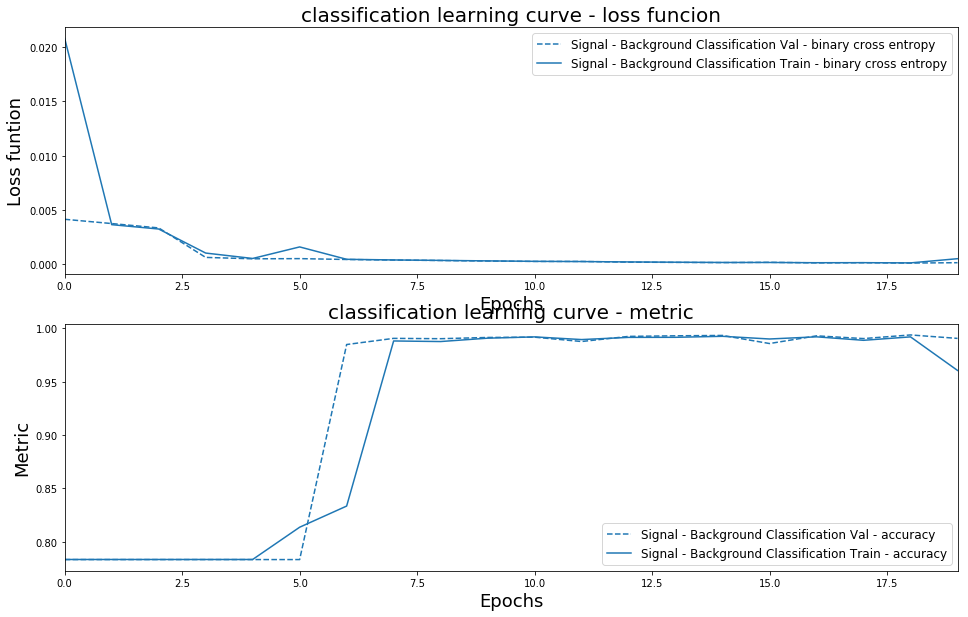

In [69]:
fig=plot_history([('signal - background classification',model_history)])

In [70]:
results = model.predict(X_val[features_train[:]], batch_size=10000)

In [71]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_val, results,sample_weight=X_val[b'evt_scale1fb'][:])
#auc = roc_auc_score(y_test, results)
print("area under ROC curve: ", auc)

area under ROC curve:  0.9935915441914507


In [72]:
databkg_2016_test=databkg_2016[databkg_2016[b'MLtag']==0]
datasig_T1bbbb_2016_test=datasig_T1bbbb_2016[datasig_T1bbbb_2016[b'MLtag']==0]
pd.options.mode.chained_assignment = None
databkg_2016_test[b'sigtag']=0
datasig_T1bbbb_2016_test[b'sigtag']=1

In [74]:
sigtest_score= model.predict(datasig_T1bbbb_2016_test[features_train[:]], batch_size=10000)
bkgtest_score= model.predict(databkg_2016_test[features_train[:]],batch_size=10000)

In [76]:
databkg_2016_test[b'MLscore']=bkgtest_score
datasig_T1bbbb_2016_test[b'MLscore']=sigtest_score

(array([1135220.,   14447.,    4948.,    3206.,    2551.,    2111.,
           1852.,    2030.,    2164.,   43562.]),
 array([0.02283077, 0.12054738, 0.218264  , 0.3159806 , 0.4136972 ,
        0.5114138 , 0.60913044, 0.7068471 , 0.8045637 , 0.9022803 ,
        0.9999969 ], dtype=float32),
 <a list of 10 Patch objects>)

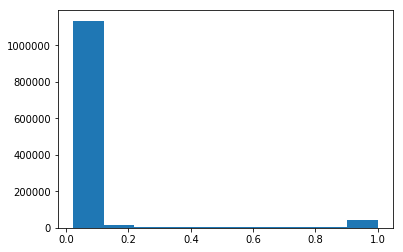

In [77]:
plt.hist(databkg_2016_test[b'MLscore'])

(array([1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        2.000000e+00, 4.377605e+06]),
 array([0.9374038 , 0.9436631 , 0.94992244, 0.9561817 , 0.962441  ,
        0.96870035, 0.9749597 , 0.981219  , 0.98747826, 0.9937376 ,
        0.9999969 ], dtype=float32),
 <a list of 10 Patch objects>)

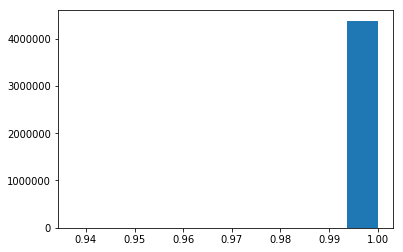

In [78]:
plt.hist(datasig_T1bbbb_2016_test[b'MLscore'])

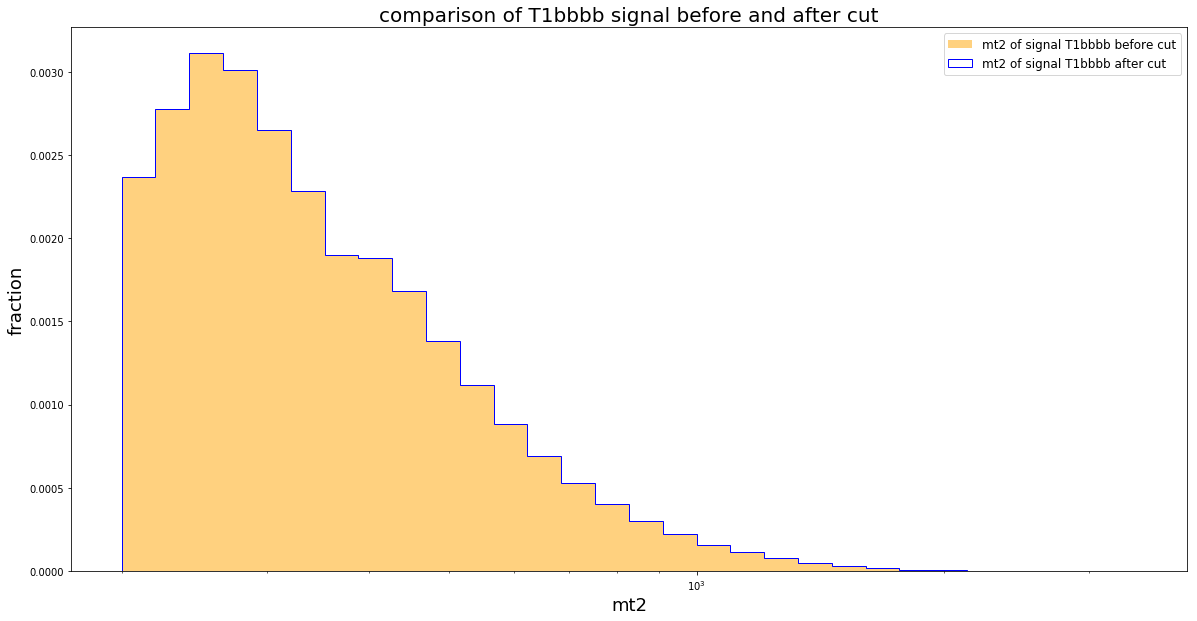

In [92]:
fig1 = plt.figure(figsize=(20,10))
ax0 = fig1.add_subplot(111)
bins=np.histogram(datasig_T1bbbb_2016_test[b'mt2'],bins=30)[1]
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
labels=['mt2 of signal T1bbbb before cut','mt2 of signal T1bbbb after cut']
ax0.hist(datasig_T1bbbb_2016_test[b'mt2'],
             bins=logbins,density=True,alpha=0.5,color='orange',
             label=labels[0])
ax0.hist(datasig_T1bbbb_2016_test[datasig_T1bbbb_2016_test[b'MLscore']>0.5][b'mt2'],
             bins=logbins,density=True,color='b',histtype='step',
             label=labels[1])
ax0.legend(loc='best',prop={'size': 12})
ax0.set_xscale('log')
ax0.set_xlabel('mt2',fontsize=18)
ax0.set_ylabel('fraction',fontsize=18)
ax0.set_title('comparison of T1bbbb signal before and after cut',size=20)
fig1.show()

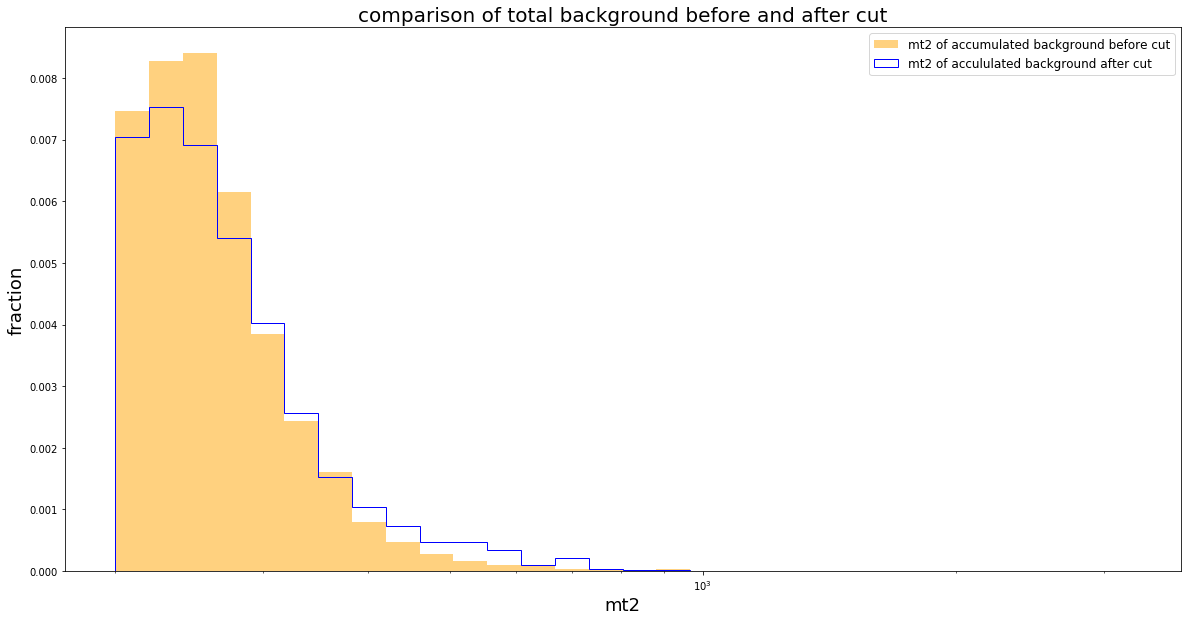

In [91]:
fig2 = plt.figure(figsize=(20,10))
ax2 = fig2.add_subplot(111)
bins=np.histogram(databkg_2016_test[b'mt2'],bins=30)[1]
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
labels=['mt2 of accumulated background before cut','mt2 of accululated background after cut']
ax2.hist(databkg_2016_test[b'mt2'],
             bins=logbins,density=True,alpha=0.5,color='orange',
         weights=databkg_2016_test[b'evt_scale1fb'],
             label=labels[0])
ax2.hist(databkg_2016_test[databkg_2016_test[b'MLscore']>0.5][b'mt2'],
             bins=logbins,density=True,color='b',histtype='step',
         weights=databkg_2016_test[databkg_2016_test[b'MLscore']>0.5][b'evt_scale1fb'],
             label=labels[1])
ax2.legend(loc='best',prop={'size': 12})
ax2.set_xscale('log')
ax2.set_xlabel('mt2',fontsize=18)
ax2.set_ylabel('fraction',fontsize=18)
ax2.set_title('comparison of total background before and after cut',size=20)
fig2.show()

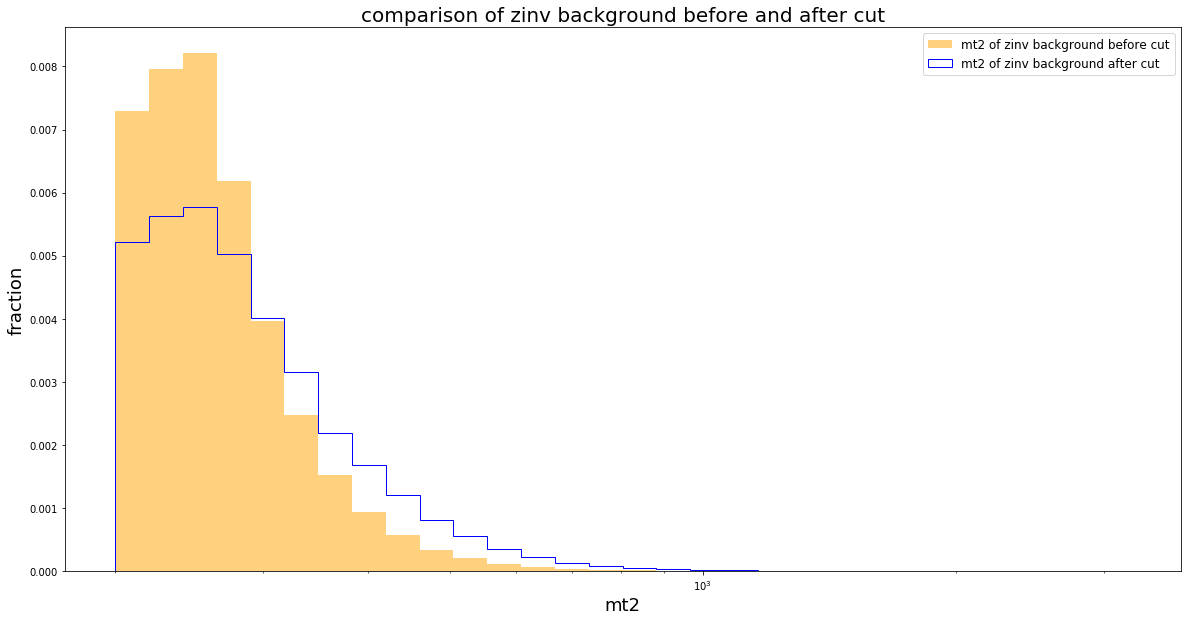

In [94]:
fig3 = plt.figure(figsize=(20,10))
ax3 = fig3.add_subplot(111)
bins=np.histogram(databkg_2016_test[databkg_2016_test[b'bkgtype']==8][b'mt2'],bins=30)[1]
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
labels=['mt2 of zinv background before cut','mt2 of zinv background after cut']
ax3.hist(databkg_2016_test[databkg_2016_test[b'bkgtype']==8][b'mt2'],
             bins=logbins,density=True,alpha=0.5,color='orange',
         weights=databkg_2016_test[databkg_2016_test[b'bkgtype']==8][b'evt_scale1fb'],
             label=labels[0])
ax3.hist(databkg_2016_test[(databkg_2016_test[b'MLscore']>0.5)&(databkg_2016_test[b'bkgtype']==8)][b'mt2'],
             bins=logbins,density=True,color='b',histtype='step',
         weights=databkg_2016_test[(databkg_2016_test[b'MLscore']>0.5)&(databkg_2016_test[b'bkgtype']==8)][b'evt_scale1fb'],
             label=labels[1])
ax3.legend(loc='best',prop={'size': 12})
ax3.set_xscale('log')
ax3.set_xlabel('mt2',fontsize=18)
ax3.set_ylabel('fraction',fontsize=18)
ax3.set_title('comparison of zinv background before and after cut',size=20)
fig3.show()

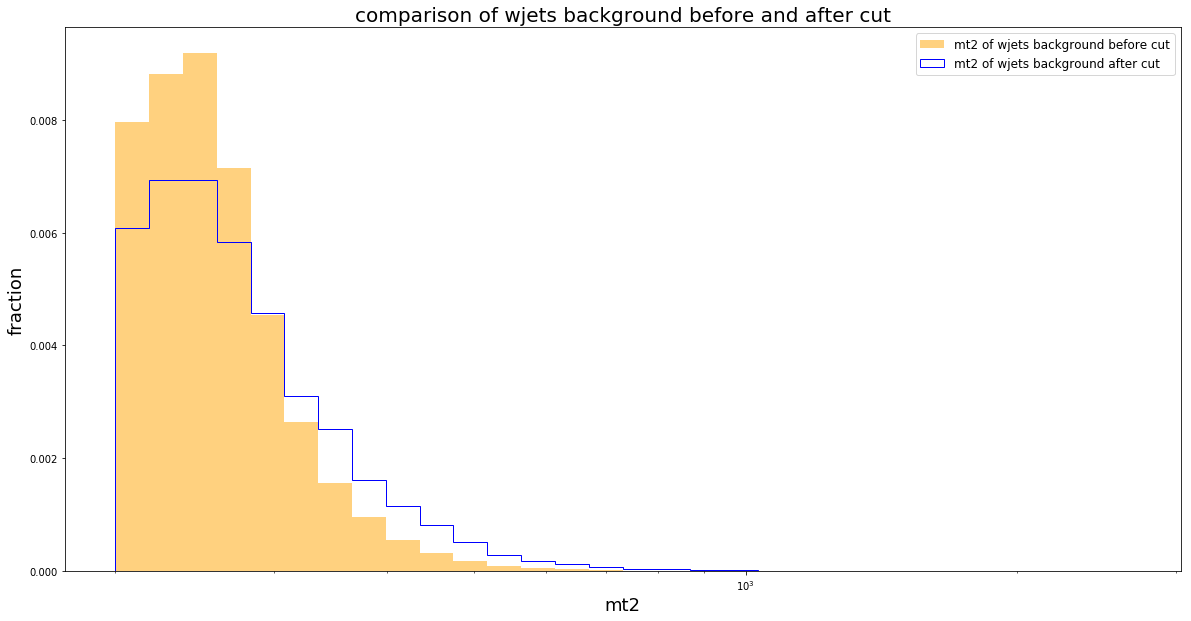

In [95]:
fig4 = plt.figure(figsize=(20,10))
ax4 = fig4.add_subplot(111)
bins=np.histogram(databkg_2016_test[databkg_2016_test[b'bkgtype']==6][b'mt2'],bins=30)[1]
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
labels=['mt2 of wjets background before cut','mt2 of wjets background after cut']
ax4.hist(databkg_2016_test[databkg_2016_test[b'bkgtype']==6][b'mt2'],
             bins=logbins,density=True,alpha=0.5,color='orange',
         weights=databkg_2016_test[databkg_2016_test[b'bkgtype']==6][b'evt_scale1fb'],
             label=labels[0])
ax4.hist(databkg_2016_test[(databkg_2016_test[b'MLscore']>0.5)&(databkg_2016_test[b'bkgtype']==6)][b'mt2'],
             bins=logbins,density=True,color='b',histtype='step',
         weights=databkg_2016_test[(databkg_2016_test[b'MLscore']>0.5)&(databkg_2016_test[b'bkgtype']==6)][b'evt_scale1fb'],
             label=labels[1])
ax4.legend(loc='best',prop={'size': 12})
ax4.set_xscale('log')
ax4.set_xlabel('mt2',fontsize=18)
ax4.set_ylabel('fraction',fontsize=18)
ax4.set_title('comparison of wjets background before and after cut',size=20)
fig4.show()

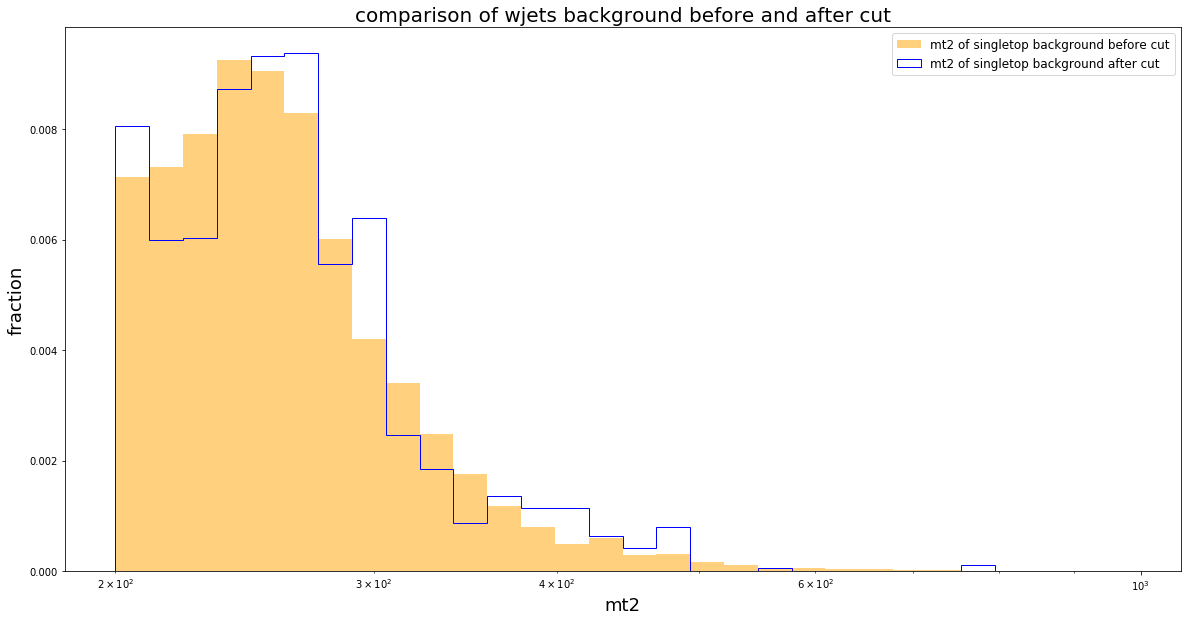

In [96]:
fig5 = plt.figure(figsize=(20,10))
ax5 = fig5.add_subplot(111)
bins=np.histogram(databkg_2016_test[databkg_2016_test[b'bkgtype']==3][b'mt2'],bins=30)[1]
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
labels=['mt2 of singletop background before cut','mt2 of singletop background after cut']
ax5.hist(databkg_2016_test[databkg_2016_test[b'bkgtype']==3][b'mt2'],
             bins=logbins,density=True,alpha=0.5,color='orange',
         weights=databkg_2016_test[databkg_2016_test[b'bkgtype']==3][b'evt_scale1fb'],
             label=labels[0])
ax5.hist(databkg_2016_test[(databkg_2016_test[b'MLscore']>0.5)&(databkg_2016_test[b'bkgtype']==3)][b'mt2'],
             bins=logbins,density=True,color='b',histtype='step',
         weights=databkg_2016_test[(databkg_2016_test[b'MLscore']>0.5)&(databkg_2016_test[b'bkgtype']==3)][b'evt_scale1fb'],
             label=labels[1])
ax5.legend(loc='best',prop={'size': 12})
ax5.set_xscale('log')
ax5.set_xlabel('mt2',fontsize=18)
ax5.set_ylabel('fraction',fontsize=18)
ax5.set_title('comparison of wjets background before and after cut',size=20)
fig5.show()